<a href="https://colab.research.google.com/github/benpaul875/Endometriosis_prediction/blob/main/EDA_customer_service_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Importing Required Libraries
#✅In this part, we are installing all the required libraries

#✅Imports various Python libraries used for data analysis, visualization, machine learning, and deep learning.

#✅Data manipulation and analysis (pandas, numpy).

#✅Data visualization (seaborn, matplotlib).

#✅Machine learning (Random Forest from sklearn).

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Step 2: Reading Dataset

##df.head() is a pandas function used to display the first few rows of a DataFrame. By default, it shows the first five rows, but you can specify the number of rows to display.

In [ ]:
df=pd.read_csv('/content/customer_service_data (1).csv')

#Dataset Description: Customer Service Analytics
##This synthetic dataset simulates customer interactions with a service support team. It is designed for exploratory data analysis (EDA), visualization, and machine learning use cases such as churn prediction or satisfaction scoring.

## Overview:
Total Records: 500

Objective: Analyze customer service performance metrics and understand how they relate to customer satisfaction and churn behavior

In [ ]:
df.head(20)

,CustomerID,TicketType,Channel,ResponseTime,ResolutionTime,SatisfactionScore,Churn,CustomerTenure
0,1,Billing,Phone,25.8,50.0,5,No,30
1,2,General,Phone,10.6,45.7,3,Yes,57
2,3,Technical,Email,27.8,58.6,3,No,40
3,4,Technical,Chat,30.1,62.4,2,No,18
4,5,Billing,Phone,29.6,36.2,4,No,51
5,6,Billing,Email,34.8,28.0,3,No,48
6,7,Billing,Chat,32.3,20.5,2,No,2
7,8,General,Chat,28.6,55.6,3,Yes,32
8,9,Technical,Chat,23.3,31.4,1,No,8
9,10,Technical,Phone,7.4,15.7,1,No,22


##Step3: Analyzing the Data

#Analyzing the Data Gaining general knowledge about the data—including its values, kinds, number of rows and columns, and missing values—is the primary objective of data understanding.
##shape: shape will show how many features (columns) and observations (rows) there are in the dataset.

In [ ]:
df.size

4000

##df.size is an attribute in pandas that returns the total number of elements (cells) in the DataFrame



In [ ]:
df.shape

(500, 8)

In [ ]:
df.describe()

,CustomerID,ResponseTime,ResolutionTime,SatisfactionScore,CustomerTenure
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,25.211600,49.212800,3.192000,30.718000
std,144.481833,9.729036,14.916384,1.173836,16.936829
min,1.000000,0.200000,4.200000,1.000000,1.000000
25%,125.750000,18.400000,39.225000,3.000000,16.000000
50%,250.500000,25.300000,48.900000,3.000000,30.000000
75%,375.250000,31.350000,59.100000,4.000000,45.250000
max,500.000000,49.800000,95.900000,5.000000,59.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         500 non-null    int64  
 1   TicketType         500 non-null    object 
 2   Channel            500 non-null    object 
 3   ResponseTime       500 non-null    float64
 4   ResolutionTime     500 non-null    float64
 5   SatisfactionScore  500 non-null    int64  
 6   Churn              500 non-null    object 
 7   CustomerTenure     500 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 31.4+ KB


In [ ]:
df = df.drop(columns=['CustomerID'])

In [ ]:
df.head()

,TicketType,Channel,ResponseTime,ResolutionTime,SatisfactionScore,Churn,CustomerTenure
0,Billing,Phone,25.8,50.0,5,No,30
1,General,Phone,10.6,45.7,3,Yes,57
2,Technical,Email,27.8,58.6,3,No,40
3,Technical,Chat,30.1,62.4,2,No,18
4,Billing,Phone,29.6,36.2,4,No,51


In [ ]:
df.dtypes

,0
CustomerID,int64
TicketType,object
Channel,object
ResponseTime,float64
ResolutionTime,float64
SatisfactionScore,int64
Churn,object
CustomerTenure,int64


##Check for Duplicate Rows

In [ ]:
# Returns a boolean Series
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [ ]:
# Filter DataFrame to show only duplicates
df[df.duplicated()]


,CustomerID,TicketType,Channel,ResponseTime,ResolutionTime,SatisfactionScore,Churn,CustomerTenure


df = df.drop('CustomerID', axis=1)
df.head()

##info() facilitates comprehension of the data type and related information, such as the quantity of records in each column, whether the data is null or not, the type of data, and the dataset’s memory use.

In [ ]:
df.isnull().sum()

,0
CustomerID,0
TicketType,0
Channel,0
ResponseTime,0
ResolutionTime,0
SatisfactionScore,0
Churn,0
CustomerTenure,0


##df.isnull().sum() checks for missing values in each column of the DataFrame ‘df’ and returns the sum of null values for each column

##STEP3: UNIVARIATE ANALYSIS

<ipython-input-33-3306830694>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SatisfactionScore', data=df, palette='viridis')


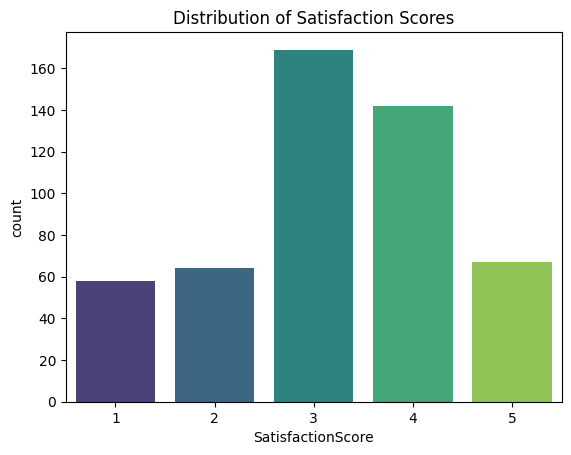

In [ ]:
# Distribution of Satisfaction Score
sns.countplot(x='SatisfactionScore', data=df, palette='viridis')
plt.title('Distribution of Satisfaction Scores')
plt.show()


<ipython-input-34-2216094297>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TicketType', data=df, palette='Set2')


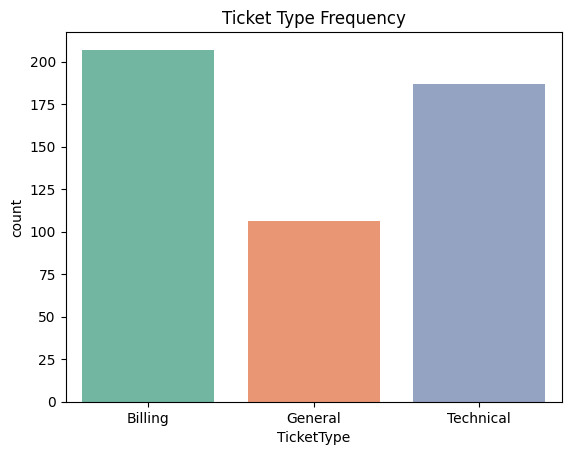

In [ ]:
# Ticket Type Frequency
sns.countplot(x='TicketType', data=df, palette='Set2')
plt.title('Ticket Type Frequency')
plt.show()


<ipython-input-35-315081437>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=df, palette='pastel')


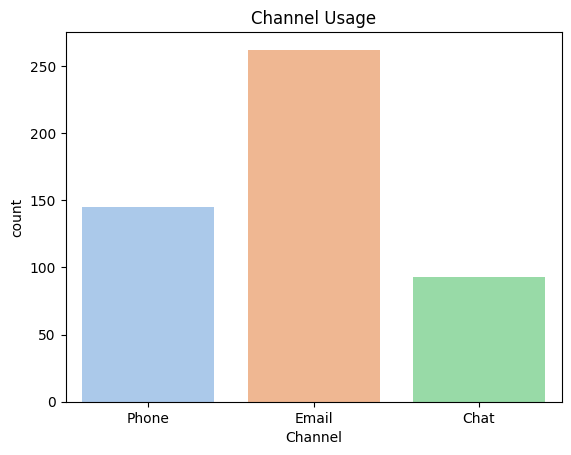

In [ ]:
# Service Channel Usage
sns.countplot(x='Channel', data=df, palette='pastel')
plt.title('Channel Usage')
plt.show()

##BIVARIATE ANALYSIS

<ipython-input-36-2169071829>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SatisfactionScore', y='ResponseTime', data=df, palette='coolwarm')


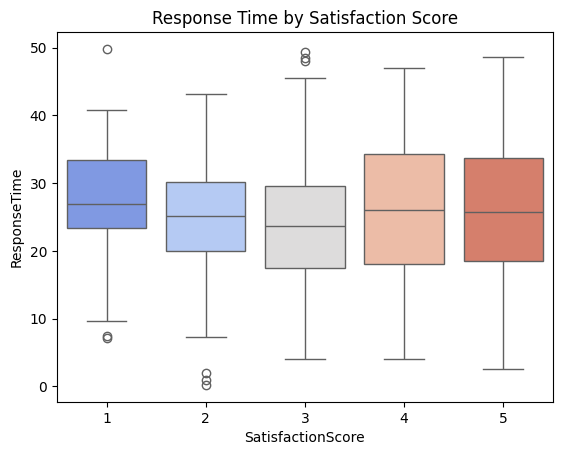

In [ ]:
# Response Time vs Satisfaction Score
sns.boxplot(x='SatisfactionScore', y='ResponseTime', data=df, palette='coolwarm')
plt.title('Response Time by Satisfaction Score')
plt.show()


## Creates a boxplot to visualize the distribution of ResponseTime across different SatisfactionScore levels

x='SatisfactionScore': Sets the categories on the x-axis (e.g., 1–5 rating scale).

y='ResponseTime': The continuous variable on the y-axis.

data=df: Specifies the DataFrame containing the data.

palette='coolwarm': Sets the color scheme using a diverging palette to distinguish scores.

<ipython-input-37-177163582>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SatisfactionScore', y='ResolutionTime', data=df, palette='coolwarm')


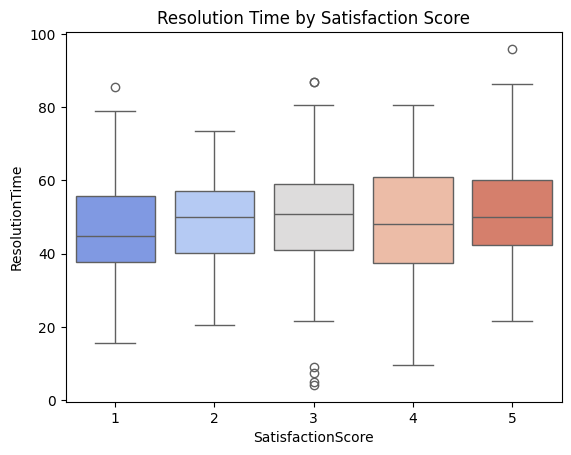

In [ ]:
# Resolution Time vs Satisfaction Score
sns.boxplot(x='SatisfactionScore', y='ResolutionTime', data=df, palette='coolwarm')
plt.title('Resolution Time by Satisfaction Score')
plt.show()

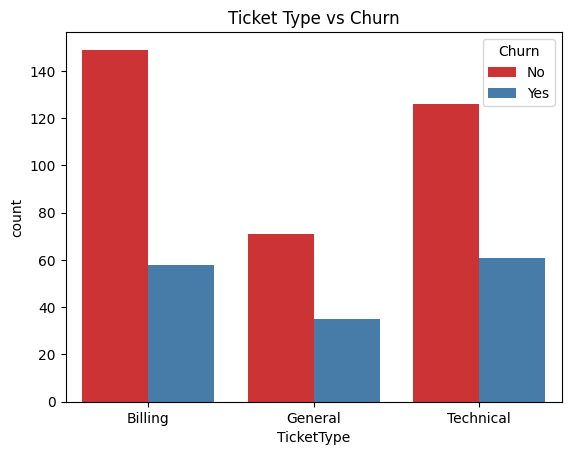

In [ ]:
# Ticket Type vs Churn
# # Creates a grouped bar chart showing churn distribution for each ticket type
sns.countplot(x='TicketType', hue='Churn', data=df, palette='Set1')
plt.title('Ticket Type vs Churn')
plt.show()


 #Key Insights:
- Customers with longer response times tend to give lower satisfaction scores.
- Billing issues are more commonly associated with churn.
- Most tickets come through email, but phone may offer faster resolution.
- Satisfaction is negatively correlated with response and resolution times.


##STEP6:CORRELATION HEATMAP

In [ ]:
# Select numerical columns
num_cols = ['ResponseTime', 'ResolutionTime', 'SatisfactionScore', 'CustomerTenure']
corr = df[num_cols].corr()

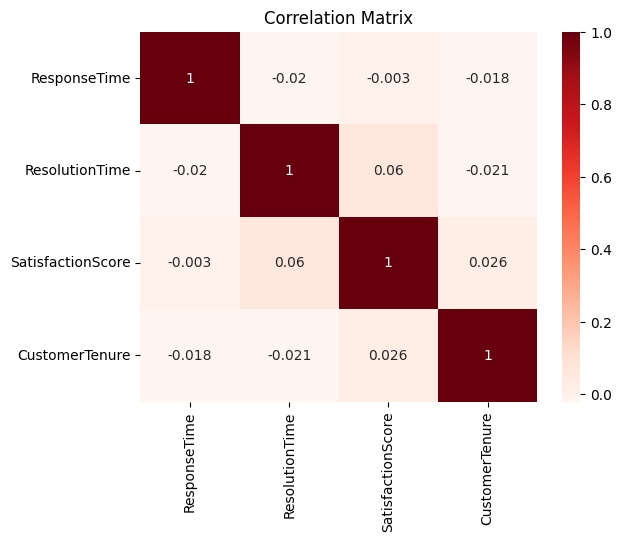

In [ ]:
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()


#interpreting the Correlation Matrix
What the Heatmap Shows:
The values range from -1 to 1, where:

1 = perfect positive correlation

-1 = perfect negative correlation

0 = no correlation

Insights from the Heatmap:
ResponseTime has almost no correlation with SatisfactionScore (correlation ≈ -0.003).

ResolutionTime has a weak positive correlation with SatisfactionScore (≈ 0.06).

CustomerTenure also shows very weak correlation with SatisfactionScore and other features (all near zero).

Conclusion:
No strong correlations were observed between the customer service metrics.

This may suggest nonlinear relationships or that other features may have a stronger influence on Satisfaction or Churn.

Further analysis (e.g. using machine learning or feature engineering) might uncover hidden patterns.



##DATA PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()

df_encoded['TicketType'] = le.fit_transform(df_encoded['TicketType'])
df_encoded['Channel'] = le.fit_transform(df_encoded['Channel'])
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Drop CustomerID
X = df_encoded.drop(columns=['CustomerID', 'Churn'])
y = df_encoded['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


##MODEL EVALUATION

Accuracy: 0.64


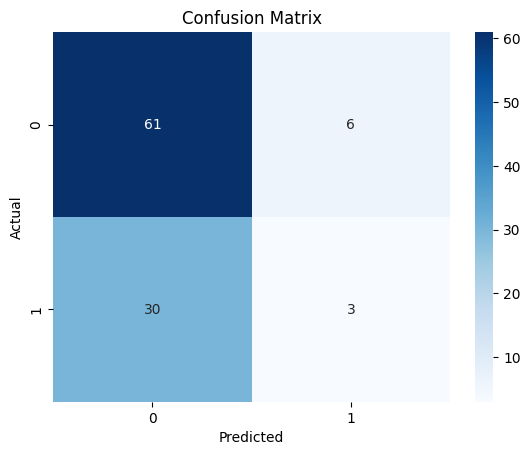

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        67
           1       0.33      0.09      0.14        33

    accuracy                           0.64       100
   macro avg       0.50      0.50      0.46       100
weighted avg       0.56      0.64      0.56       100



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


##FEATURE ENGINEERING

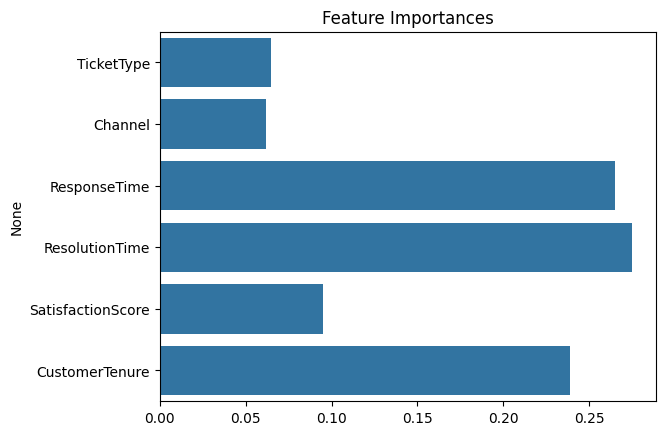

In [ ]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


#Importance of EDA in Customer Service
##1. Understand Customer Behavior
Identify trends and patterns in customer interactions (e.g., peak complaint times, frequent issues).

Helps segment customers based on satisfaction, churn risk, or service needs.

##2. Improve Decision-Making
Data-driven insights enable better allocation of resources (e.g., assigning staff to high-demand times).

Supports development of tailored service strategies.

##3. Detect Operational Bottlenecks
Pinpoint slow response or resolution times that lead to dissatisfaction.

Highlight inefficiencies in ticket handling processes.

##4. Enhance Customer Retention
Analyze churn-related features and intervene early.

Understand which service factors (e.g., agent responsiveness) impact loyalty.

##5. Validate Business Hypotheses
EDA helps confirm or disprove assumptions (e.g., "long wait times cause low satisfaction").

##6. Guide Machine Learning Models
Helps select relevant features for churn prediction, satisfaction scoring, or workload forecasting.

